# MNIST

## import the essintial library

In [1]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

## Load data set

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

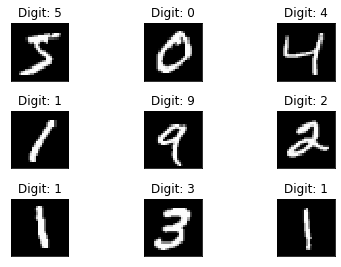

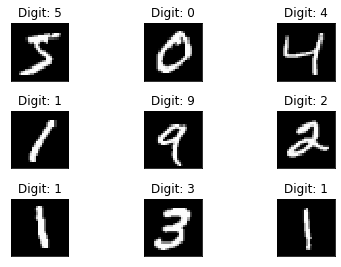

In [3]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

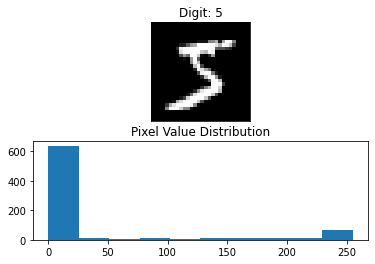

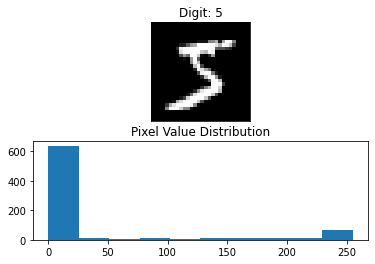

In [4]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

## feature scaling

In [5]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [6]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## build a model

In [7]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [9]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = ""
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)



Epoch 1/20
469/469 - 21s - loss: 0.2504 - accuracy: 0.9241 - val_loss: 0.1071 - val_accuracy: 0.9687
Epoch 2/20
469/469 - 7s - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.0775 - val_accuracy: 0.9761
Epoch 3/20
469/469 - 7s - loss: 0.0708 - accuracy: 0.9776 - val_loss: 0.0676 - val_accuracy: 0.9776
Epoch 4/20
469/469 - 7s - loss: 0.0539 - accuracy: 0.9827 - val_loss: 0.0663 - val_accuracy: 0.9798
Epoch 5/20
469/469 - 7s - loss: 0.0452 - accuracy: 0.9851 - val_loss: 0.0656 - val_accuracy: 0.9788
Epoch 6/20
469/469 - 7s - loss: 0.0386 - accuracy: 0.9869 - val_loss: 0.0702 - val_accuracy: 0.9797
Epoch 7/20
469/469 - 7s - loss: 0.0342 - accuracy: 0.9883 - val_loss: 0.0751 - val_accuracy: 0.9796
Epoch 8/20
469/469 - 7s - loss: 0.0321 - accuracy: 0.9893 - val_loss: 0.0737 - val_accuracy: 0.9781
Epoch 9/20
469/469 - 6s - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0631 - val_accuracy: 0.9821
Epoch 10/20
469/469 - 7s - loss: 0.0247 - accuracy: 0.9919 - val_loss: 0.0704 - val_accuracy: 0.983

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



9811  classified correctly
189  classified incorrectly


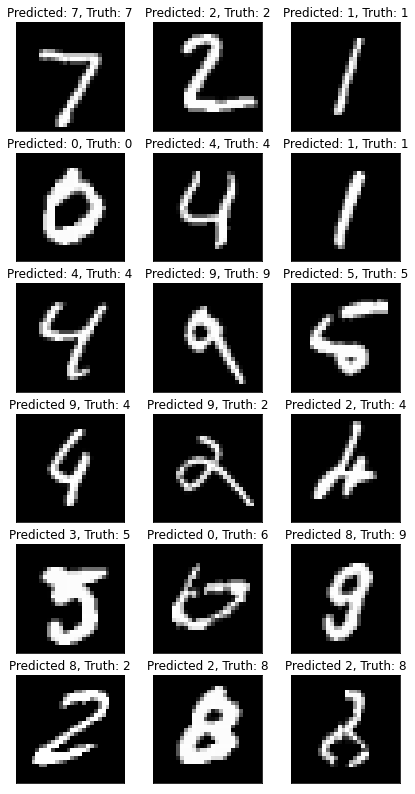

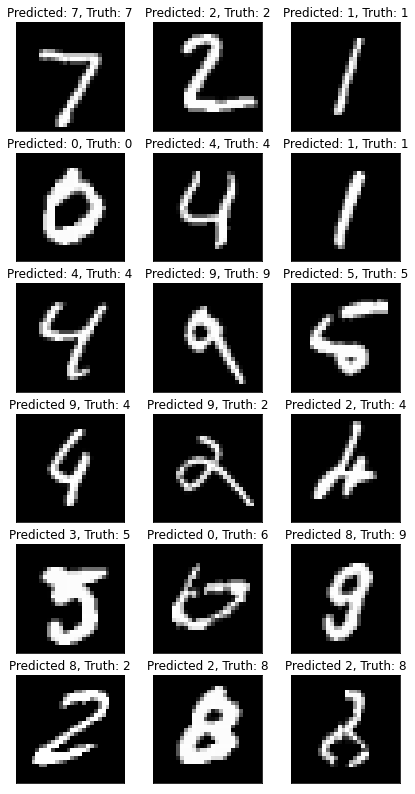

In [10]:
# load the model and create predictions on the test set
mnist_model = load_model('keras_mnist.h5')
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation